In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [140]:
data = pd.read_csv('_classes.csv')
data.head()

,filename,dog,person
0,IMG_0054_jpg.rf.03e0fd11bad6afeb085f2f156d7fd0...,1,0
1,IMG_0056_jpg.rf.0255dca8946ea0a34592394acd67b1...,1,0
2,IMG_0112_jpg.rf.016d04c2af3bc0221a5153d6af8b9f...,0,1
3,IMG_0094_jpg.rf.03dbd175cdbd5379608debcc783a53...,0,1
4,IMG_0109_jpg.rf.03607def018d49330ebef9a856f658...,0,1


In [141]:
def load_and_preprocess_images(image_paths, image_size):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [142]:
features = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

In [143]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [145]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [146]:
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [161]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dense(num_classes, activation='softmax'))

In [162]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [163]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=32)

Epoch 1/70
4/4 [==============================] - 1s 75ms/step - loss: 4.9568 - accuracy: 0.0088 - val_loss: 4.9596 - val_accuracy: 0.0000e+00
Epoch 2/70
4/4 [==============================] - 0s 20ms/step - loss: 4.9549 - accuracy: 0.0088 - val_loss: 4.9639 - val_accuracy: 0.0000e+00
Epoch 3/70
4/4 [==============================] - 0s 21ms/step - loss: 4.9536 - accuracy: 0.0088 - val_loss: 4.9684 - val_accuracy: 0.0000e+00
Epoch 4/70
4/4 [==============================] - 0s 19ms/step - loss: 4.9524 - accuracy: 0.0088 - val_loss: 4.9734 - val_accuracy: 0.0000e+00
Epoch 5/70
4/4 [==============================] - 0s 20ms/step - loss: 4.9511 - accuracy: 0.0088 - val_loss: 4.9788 - val_accuracy: 0.0000e+00
Epoch 6/70
4/4 [==============================] - 0s 23ms/step - loss: 4.9497 - accuracy: 0.0088 - val_loss: 4.9848 - val_accuracy: 0.0000e+00
Epoch 7/70
4/4 [==============================] - 0s 20ms/step - loss: 4.9482 - accuracy: 0.0088 - val_loss: 4.9914 - val_accuracy: 0.0000e+00

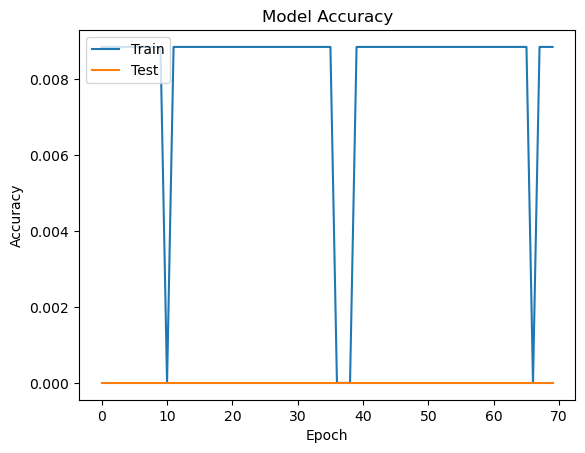

In [164]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [165]:
y_pred = model.predict(X_test)
confidence_levels = np.max(y_pred, axis=1)

1/1 [==============================] - 0s 66ms/step
